# Assignment 3

This notebook contains a set of exercises that will guide you through the different steps of this assignment. The aim of this assignment is to donwload and inspect the Stop, Question and Frisk Data released by the New York Police Department every year.

<div class="alert alert-danger"><b>Submission deadline:</b> Thursday, December 17, 20:00</div>

### Instructions

Read carefully the following instructions before starting the exercises.

- This notebook is automatically graded. This means that there are several cells embedded into the notebook that take care of checking your code and grading it. It also means that it is important **to follow the instructions for each of the exercises** to make sure that you do everything right.

- Write your code in the dedicated cells. You can use as many cells as you like. Just make sure to include all the necessary code **before the corresponding test**.

- The tests for the introductory exercises will be open for you to see. This will help you understand how the pipeline works and check that you got the basics right. You can run these checks as many times as you want, **as long as you don't modify them**.  

- The tests for the graded exercises will remain hidden. It is important that you **do not write any code, nor do you remove the cells left in blank** for this purpose. 

- Remember that tests look for specific variable and objects. This means that in order to receive the points for each exercise, you need to **create those objects**.

Before moving on, please run the following cell. You only need run it once in order to install the ```nose``` library.

In [1]:
pip install nose

Note: you may need to restart the kernel to use updated packages.


## Some background

The stop-question-and-frisk program, or stop-and-frisk, in New York City, is a New York City Police Department practice of temporarily detaining, questioning, and at times searching civilians and suspects on the street for weapons and other contraband. This policy allowed police officers to stop, interrogate and search New York City citizens on the sole basis of “reasonable suspicion” for several years.

The stop-question-and-frisk program exploded into a national controversy during the mayoral administration of Michael Bloomberg, as the number of NYPD stops each year grew to hundreds of thousands. Most of the people stopped were black and Latino, and nearly all were innocent. 

<img src='https://www.dropbox.com/s/uo6rj86eqvnusfy/stopandfrisk.png?raw=1' width=700>

In 1999, Blacks and Latinos made up 50 percent of New York’s population, but accounted for 84 percent of the city’s stops. Those statistics changed little in the following decade. Between 2004 and 2012, the New York Police Department made 4.4 million stops under the citywide policy. More than 80 percent of those stopped were Black and Latino people. The likelihood that a stopped African-American New Yorker yielded a weapon was half that of White New Yorkers stopped, and the likelihood of finding contraband on an African American who was stopped was one-third that of White New Yorkers stopped.

Stop-and-frisk peaked in 2011, when NYPD officers reported making nearly 700,000 stops.

In 2013, a federal judge found the New York City Police Department’s “Stop-and-Frisk” policy unconstitutional and ruled that NYPD’s stop-and-frisk tactics violate the U.S Constitution’s 4th Amendment prohibition of unreasonable searches and seizures.

## Getting started

Let's begin by taking a look at the data. You can also download it from this [link](https://urledu-my.sharepoint.com/:f:/g/personal/irene_unceta_esade_edu/EltmA-P6QQJGgD9mMR4aGsYBkyvgF43eqXdjLmgyCtFCLA?e=5xfirN).

Raw data records from the NYPD Stop, Question, and Frisk database are available for download at the following [link](https://www1.nyc.gov/site/nypd/stats/reports-analysis/stopfrisk.page). In this assignmnet we are going to use the data for the years 2003 through 2013. The corresponding databases have already been downloaded and prepared for you and are included into the same zip container where this notebook is located. 

<div class="alert alert-warning">Before moving on, check that files <i>2003.csv</i>, <i>2004.csv</i>, <i>2005.csv</i>, <i>2006.csv</i>, <i>2007.csv</i>, <i>2008.csv</i>, <i>2009.csv</i>, <i>2010.csv</i>, <i>2011.csv</i>, <i>2012.csv</i> and <i>2013.csv</i> are included in the folder you downloaded from moodle.</div>

In addition to the above, two additional files have also been included in the same folder:

- The file called <i>legend.xlsx</i> contains code books for all the variables listed for the different years.
- The file called <i>precincts.csv</i> contains information about how the different police precincts that appear in the police records above are classified into boroughs.

<div class="alert alert-warning">Before moving on, check that files <i>legend.xlsx</i> and <i>precincts.csv</i> are included in the folder you downloaded from moodle.</div>

Remember that in order to work with these files, there are certain things that you need to consider:

- If you are using Conda or any other Desktop app to run your code, make sure you save the data to the same folder where this notebook is located or, alternatively, that you identify the path to the directory where the files are located.

- If you are using Colab, you'll need to upload all the files separately. You can either store them in a dedicated Drive folder, and then access them using the path to that folder, or upload them directly to the file folder in your working notebook. Remember that you can copy the path for any given file in Colab by right clicking on top of it and selecting "copy path".

## Importing the data

Once you are done downloading the databases and checking that everything is in order, let's begin by importing the stop-and-frisk data.

<div class="alert alert-info"><b>Exercise 1 </b>Write the code to read the data for each of the years and concatenate them all in a single DataFrame called <i>df</i>. This DataFrame should contain the data for the years 2003 through 2013 and the whole set of columns.</div>

<div class="alert alert-warning">When importing some of the files, you may get a warning stating that certain columns have mixed types. You can just ignore it. If it gets very annoying, set the <i>low_memory</i> parameter to False when reading the data. Note that as a consequence, it might take a bit longer to import all the data.</div>

In [2]:
import pandas as pd

list1 = []
list1.append(pd.read_csv('2003.csv', low_memory = False))
list1.append(pd.read_csv('2004.csv', low_memory = False))
list1.append(pd.read_csv('2005.csv', low_memory = False))
list1.append(pd.read_csv('2006.csv', low_memory = False))
list1.append(pd.read_csv('2007.csv', low_memory = False))
list1.append(pd.read_csv('2008.csv', low_memory = False))
list1.append(pd.read_csv('2009.csv', low_memory = False))
list1.append(pd.read_csv('2010.csv', low_memory = False))
list1.append(pd.read_csv('2011.csv', low_memory = False))
list1.append(pd.read_csv('2012.csv', low_memory = False))
list1.append(pd.read_csv('2013.csv', low_memory = False))
df = pd.concat(list1)

The following cell runs additional checks to your code. Please **don't write any code here**. Just leave it as it is.

In [3]:
# LEAVE BLANK

The dabases contain information about a very long series of items. Here, we are only going to focus on some of them. Since our DataFrame is so big that it may already be slowing down your computer, let's remove those columns that we are not going to use.

The list shown below contains the information we are interesting in, meaning the columns that you should retain.

In [4]:
information = ["YEAR OF STOP (CCYY)", "PRECINCT OF STOP (FROM 1 TO 123)", "WAS AN ARREST MADE ?", 
               "WAS A SUMMONS ISSUED ?", "WAS A PISTOL FOUND ON SUSPECT ?", "WAS A RIFLE FOUND ON SUSPECT ?", 
               "WAS AN ASSAULT WEAPON FOUND ON SUSPECT ?", "WAS A KNIFE OR CUTTING INSTRUMENT FOUND ON SUSPECT ?",
               "WAS A MACHINE GUN FOUND ON SUSPECT ?","WAS ANOTHER TYPE OF WEAPON FOUND ON SUSPECT", 
               "PHYSICAL FORCE USED BY OFFICER - HANDS", "PHYSICAL FORCE USED BY OFFICER - SUSPECT AGAINST WALL",
               "PHYSICAL FORCE USED BY OFFICER - SUSPECT ON GROUND", "PHYSICAL FORCE USED BY OFFICER - WEAPON DRAWN",
               "PHYSICAL FORCE USED BY OFFICER - WEAPON POINTED", "PHYSICAL FORCE USED BY OFFICER - BATON",
               "PHYSICAL FORCE USED BY OFFICER - HANDCUFFS", "PHYSICAL FORCE USED BY OFFICER - PEPPER SPRAY",
               "PHYSICAL FORCE USED BY OFFICER - OTHER", "SUSPECT'S RACE"]

<div class="alert alert-info"><b>Exercise 2 </b>Write the code to identify the columns that contain the information above and remove all the other columns from your <i>df</i> DataFrame. Don't modify neither the name of the Dataframe nor any of the column names when doing so.</div>

In [5]:
df_legend = pd.read_excel('legend.xlsx')
columns_remaining = list(pd.merge(pd.DataFrame(information, columns=['Label']),df_legend,on='Label')['Variable'])

In [6]:
df = df[columns_remaining]

The following cell runs additional checks to your code. Please **don't write any code here**. Just leave it as it is.

In [7]:
# LEAVE BLANK

The following exercises will guide you to prepare the data first and then to visualize them. Make sure **not to modify** the name of your DataFrame from now on. 

## Pre-processing the data

Since there are too many different precincts for us to make sense of these data, let's add in the information about the boroughs in order to identify where the different stops took place.

<div class="alert alert-info"><b>Exercise 3 </b>Write the code to create a new column called <i>boro</i>. This column should contain the name of the borough that corresponds to the precinct of each entry in your <i>df</i> DataFrame. By the end of this exercise only the <i> boro</i> column should be added to <i>df</i>.</div>

<div class="alert alert-warning">Make sure that the number of rows doesn't get modified after completing this exercise.</div>

In [8]:
df_precincts = pd.read_csv('precincts.csv')
df_precincts_new = df_precincts.rename(columns = {'Precinct': 'pct', 'Borough': 'boro'})
df = pd.merge(df, df_precincts_new, on = 'pct')

The following cell runs additional checks to your code. Please **don't write any code here**. Just leave it as it is.

In [9]:
# LEAVE BLANK

Let's further filter down these data. Some of the columns store very similar data. For example, lots of the columns refer to *PHYSICAL FORCE USED BY OFFICER*. Since we are not interested in the specific form of force used, but rather on the existence of such force, let's aggregate the information for these columns.

<div class="alert alert-warning">You can create a new column with a conditional statement for other columns by using the function where() from numpy library and writing the corresponding condition in between parenthesis. The library has already been imported for you. You can choose to use it, if you want to use this function or. alternatively, to ignore if you come up with another way to create the new column.</div>

<div class="alert alert-info"><b>Exercise 4 </b>Write the code to create a new column called <i>physical_force</i>. This column should take the value 1 in <b>int</b> form if any of the columns <i>pf_hands</i>, <i>pf_wall</i>, <i>pf_grnd</i>, <i>pf_drwep</i>, <i>pf_ptwep</i>, <i>pf_baton</i>, <i>pf_hcuff</i>, <i>pf_pepsp</i> or <i>pf_other</i> is encoded as "Y", meaning that the corresponding force was used. Otherwise, the new column should take the value 0 in <b>int</b> form.</div>

In [10]:
import numpy as np

df['physical_force'] = np.where(df['pf_hands'] + df['pf_wall'] + df['pf_grnd'] + df['pf_drwep'] + df['pf_ptwep'] 
                                + df['pf_baton'] + df['pf_hcuff'] + df['pf_pepsp'] + df['pf_other'] 
                                == 'NNNNNNNNN', 0, 1)

The following cell runs additional checks to your code. Please **don't write any code here**. Just leave it as it is.

In [11]:
# LEAVE BLANK

The same thing happens with a set of columns that contain the phrase WAS A - FOUND ON SUSPECT ?. Once again, we are not interested in the actual type of weapon found, but on whether a weapon was indeed found on the suspect. Hence, let's aggregate all these data into a single column.

<div class="alert alert-info"><b>Exercise 5 </b>Write the code to create a new column called <i>weapons</i>. This column should take the value 1 in <b>int</b> form if any of the columns <i>pistol</i>, <i>riflshot</i>, <i>asltweap</i>, <i>knifcuti</i>, <i>machgun</i> or <i>othrweap</i> is encoded as "Y", meaning that some weapon was found on the suspect. Otherwise, the new column should take the value 0 in <b>int</b> form. As before, numpy has already been imported for you in case you want to use the <i>where</i> method.</div>

In [12]:
import numpy as np

df['weapons'] = np.where(df['pistol'] + df['riflshot'] + df['asltweap'] + df['knifcuti'] + df['machgun'] + 
                        df['othrweap'] == 'NNNNNN',0,1)

The following cell runs additional checks to your code. Please **don't write any code here**. Just leave it as it is.

In [13]:
# LEAVE BLANK

Finally, let's also aggregate the data about whether an arrest was made. We'll consider that an arrest took place if an arrest was actually made or is a summons was issued, or both.

<div class="alert alert-info"><b>Exercise 6 </b>Write the code to create a new column called <i>arrest</i>. This column should take the value 1 in <b>int</b> form if any of the columns <i>arstmade</i> or <i>sumissue</i> is encoded as "Y", meaning that some weapon was found on the suspect. Otherwise, the new column should take the value 0 in <b>int</b> form. As before, numpy has already been imported for you in case you want to use the <i>where</i> method.</div>

In [14]:
import numpy as np

df['arrest'] = np.where(df['arstmade'] + df['sumissue'] == 'NN',0,1)

The following cell runs additional checks to your code. Please **don't write any code here**. Just leave it as it is.

In [15]:
# LEAVE BLANK

Finally, let's remove redundant information.

<div class="alert alert-info"><b>Exercise 7 </b>Write the code to remove columns <i>pct</i>, <i>pf_hands</i>, <i>pf_wall</i>, <i>pf_grnd</i>, <i>pf_drwep</i>, <i>pf_ptwep</i>, <i>pf_baton</i>, <i>pf_hcuff</i>, <i>pf_pepsp</i>, <i>pf_other</i>, <i>pistol</i>, <i>riflshot</i>, <i>asltweap</i>, <i>knifcuti</i>, <i>machgun</i>, <i>othrweap</i>, <i>arstmade</i> and <i>sumissue</i> from your DataFrame <i>df</i>.</div>

<div class="alert alert-warning">Make sure to double check that you remove all the columns above. At the end of this exercise your DataFrame should contain the columns you selected in exercise 2 plus the 4 new columns you created in exercises 4, 5, and 6, minus those listed above.</div>

In [16]:
df.drop(['pct', 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp',
        'pf_other', 'pistol', 'riflshot', 'asltweap', 'knifcuti', 'machgun', 'othrweap', 'arstmade', 'sumissue'], 
       axis = 1, inplace = True)

The following cell runs additional checks to your code. Please **don't write any code here**. Just leave it as it is.

In [17]:
# LEAVE BLANK

Now that we have aggregated the data for several columns and removed all the extra ones, the final thing left to do is to pre-process the <i>race</i> column. We will begin by changing the name of the column and we will then group  the different values of this column into larger categories. 

The meaning of each of the letter codes in the <i>race</i> column is shown below, as stated in the documentation provided by NYPD:

- ' ' Not listed
- 'A' Asian/Pacific Islander
- 'B' Black
- 'I' American Indian/Alaskan native
- 'P' Black-Hispanic
- 'Q' White-Hispanic
- 'W' White
- 'X' Unknown
- 'Z' Other
- 'U' Unknown

<div class="alert alert-info"><b>Exercise 8 </b>Write the code to rename the <i>race</i> column as <i>ethnicity</i>. Then write the code to modify the values of your <i>ethnicity</i> column. This column should take the value 'Black' if the original record was encoded as Black or Black-Hispanic. It should take the value 'White' if the original record was encoded as White or White-Hispanic. It should take the value 'Asian' if the original record was encoded as Asian/Pacific Islander. It should take the value 'Other' if the original record was encoded as American Indian/Alaskan native, Other, Unknown or Not listed.</div>

<div class="alert alert-warning">Make sure to check that by the end of this exercise your DataFrame contains no new columns. You can add them to help you, but make sure to remove them before moving on.</div>


In [18]:
df.rename(columns = {'race': 'ethnicity'}, inplace = True)
df['ethnicity'] = df['ethnicity'].apply(lambda x: 'Black' if x == 'B' or x == 'P' else ('White' if x == 'W' or x == 'Q' else(
'Asian' if x == 'A' else 'Other')))

The following cell runs additional checks to your code. Please **don't write any code here**. Just leave it as it is.

In [19]:
# LEAVE BLANK

At this point, it might be a good idea to save your DataFrame. This way, when working on the remaining exercises, you can just refer to this version instead of having to run all the previous code again.

## Visualizing the data

Now that we have finished preparing the data let's visualize it.

The following exercises will each consist of two parts. The first part is focused on preparing the data and the second on plotting the data. Each part is evaluated separately. Meaning that you can still get the points for preparing the data even if you don't manage to plot it correctly.

<div class="alert alert-info"><b>Exercise 9 </b>Write the code to plot the total number of stops per year.<br/><ol><li>Write the code to store the x and y data for your plot in <b>list</b> form in new variables called <i>x</i> and <i>y</i>.</li>
    <li>Write the code to plot these data using a <b>line</b> plot. Initialize your plot to a figure called <i>fig</i>. Set the line's color to red and the plot's title to <i>Number of people stopped</i>.</li></ol></div>
    
<img src='https://www.dropbox.com/s/kzl11tmze6kjvrf/ex9.png?raw=1' width=500>

In [22]:
x = list(df['year'].unique())
y = df.groupby(df['year'])['arrest'].count().tolist()

Text(0.5, 1.0, 'Number of people stopped')

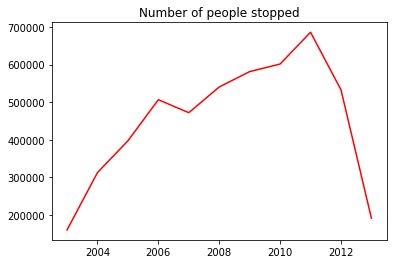

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(x,y, color = 'red')
plt.title('Number of people stopped')

The following cell runs additional checks to your code. Please **don't write any code here**. Just leave it as it is.

In [24]:
# LEAVE BLANK

In [25]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 10 </b>Write the code to plot the total number of stops per ethnicity for every year.<br/><ol><li>Write the code to store the x data for your plot in <b>list</b> form in a new variable called <i>x</i>. Store the y data for your plot in <b>list</b> form in separate variables called <i>y_black</i>, <i>y_white</i>, <i>y_asian</i> and <i>y_other</i>.</li>
    <li>Write the code to plot these data using a <b>line</b> plot. Initialize your plot to a figure called <i>fig</i>. Set the line's color for "Black" to red, for "White" to black, for "Asian" to darkgray and for "Other" to lightgray. Set the plot's title to <i>Number of people stopped by ethnicity</i>. Make sure a legend appears to the <b>upper left</b> of your plot and that the labels in the legend correspond <b>exactly</b> to the different categories of the <i>ethnicity</i> attribute.</li></ol></div>
    
<img src='https://www.dropbox.com/s/kzl11tmze6kjvrf/ex10.png?raw=1' width=500>

In [26]:
x = list(df['year'].unique())
y_black = df[df['ethnicity'] == 'Black'].groupby('year')['ethnicity'].count().tolist()
y_white = df[df['ethnicity'] == 'White'].groupby('year')['ethnicity'].count().tolist()
y_asian = df[df['ethnicity'] == 'Asian'].groupby('year')['ethnicity'].count().tolist()
y_other = df[df['ethnicity'] == 'Other'].groupby('year')['ethnicity'].count().tolist()

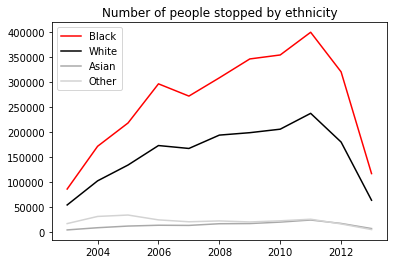

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(x, y_black, color = 'red', label = 'Black')
plt.plot(x, y_white, color = 'black', label = 'White')
plt.plot(x, y_asian, color = 'darkgray', label = 'Asian')
plt.plot(x, y_other, color = 'lightgray', label = 'Other')
plt.title('Number of people stopped by ethnicity')
plt.legend(loc = 'upper left')

The following cell runs additional checks to your code. Please **don't write any code here**. Just leave it as it is.

In [28]:
# LEAVE BLANK

In [29]:
# LEAVE BLANK

In [30]:
# LEAVE BLANK

For those people who where initially stopped, let's now take a look at the percentage that got arrested. 

<div class="alert alert-info"><b>Exercise 11 </b>Write the code to plot the percentage of arrests per ethnicity for every year.<br/><ol><li>Write the code to store the x data for your plot in <b>list</b> form in a new variable called <i>x</i>. Store the y data for your plot in <b>list</b> form in separate variables called <i>y_black_arrested</i>, <i>y_white_arrested</i>, <i>y_asian_arrested</i> and <i>y_other_arrested</i>. These values should show the percentage of arrested individuals with respect to the number of stopped people, for each listed race.</li>
    <li>Write the code to plot these data using a <b>scatter</b> plot. Initialize your plot to a figure called <i>fig</i>. Set the line's color for "Black" to red, for "White" to black, for "Asian" to darkgray and for "Other" to lightgray. Set the plot's title to <i>Percentage of people arrested by ethnicity</i>. Make sure a legend appears to the <b>lower right</b> of your plot and that the labels in the legend correspond to the different categories of the <i>ethnicity</i> attribute.</li></ol></div>

<div class="alert alert-warning">Make sure the percentages are properly encoded. Meaning that if the percentage is 1%, the corresponding list should include a 1, not a 0.01</div>

<img src='https://www.dropbox.com/s/az9a49wd5k8ppxz/ex11.png?raw=1' width=500>

In [31]:
x = list(df['year'].unique())
y_black_arrested = (df[(df['ethnicity'] == 'Black') & (df['arrest'] == 1)].groupby('year')['arrest'].count() / df[(df['ethnicity'] == 'Black')].groupby('year')['ethnicity'].count() * 100).tolist()
y_white_arrested = (df[(df['ethnicity'] == 'White') & (df['arrest'] == 1)].groupby('year')['arrest'].count() / df[(df['ethnicity'] == 'White')].groupby('year')['ethnicity'].count() * 100).tolist()
y_asian_arrested = (df[(df['ethnicity'] == 'Asian') & (df['arrest'] == 1)].groupby('year')['arrest'].count() / df[(df['ethnicity'] == 'Asian')].groupby('year')['ethnicity'].count() * 100).tolist()
y_other_arrested = (df[(df['ethnicity'] == 'Other') & (df['arrest'] == 1)].groupby('year')['arrest'].count() / df[(df['ethnicity'] == 'Other')].groupby('year')['ethnicity'].count() * 100).tolist()

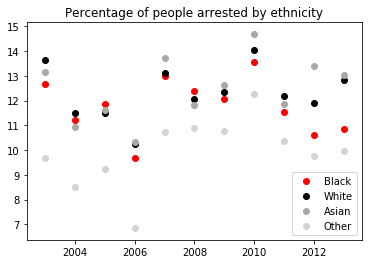

In [32]:
fig = plt.figure()
plt.scatter(x, y_black_arrested, color = 'red', label = 'Black')
plt.scatter(x, y_white_arrested, color = 'black', label = 'White')
plt.scatter(x, y_asian_arrested, color = 'darkgray', label = 'Asian')
plt.scatter(x, y_other_arrested, color = 'lightgray', label = 'Other')
plt.title('Percentage of people arrested by ethnicity')
plt.legend(loc = 'lower right')

The following cell runs additional checks to your code. Please **don't write any code here**. Just leave it as it is.

In [33]:
# LEAVE BLANK

In [34]:
# LEAVE BLANK

In [35]:
# LEAVE BLANK

## Bonus exercise

For the bonus exercises, we will take a look at the remaining data.

We will begin by analising the percentage of individuals who were carrying a weapon when found and those for whom the police used physical force among those who where initially stopped.

<div class="alert alert-danger"><b>Bonus 1 </b>Write the code to plot the percentage of people who where found carrying a weapon and the percentage of people with whom the police used physical force per ethnicity for every year.<br/><ol><li>Write the code to store the x data for your plot in <b>list</b> form in a new variable called <i>x</i>. Store the y data for your plot in <b>list</b> form in separate variables called <i>y_black_weapon</i>, <i>y_white_weapon</i>, <i>y_asian_weapon</i>, <i>y_other_weapon</i>, <i>y_black_physical_force</i>, <i>y_white_physical_force</i>, <i>y_asian_physical_force</i> and <i>y_other_physical_force</i>. The first four lists should include the percentage of individuals who were found to carry a weapon with respect to the number of stopped people, for each listed ethnicity and for every year. The last four lists should include the percentage of individuals with whom the police used physical force with respect to the number of stopped people, for each listed ethnicity and for every year.</li>
    <li>Write the code to plot these data using two different <b>line</b> plots. Initialize your plot to a figure called <i>fig</i>. Use two different subplots, one for each case. They should both appear side by side. Plot the <i>weapons</i> data to the left and the <i>physical_force</i> data to the right. Set the first plot's title to <i>Percentage of people found carrying a weapon by ethnicity</i> and second plot's title to <i>Percentage of people for which the police used physical force by ethnicity</i>. Set the line's color for "Black" to red, for "White" to black, for "Asian" to darkgray and for "Other" to lightgray for both plots. Use dashed lines for the <i>weapons</i> plot and dotted lines for the <i>physical_force</i> plot. Make sure a legend appears to the <b>upper left</b> of your <i>weapons</i> plot and to the <b>upper right</b> of your <i>physical_force</i> plot and that the labels correspond to the different categories of the <i>ethnicity</i> attribute in both cases.</li></ol></div>

<div class="alert alert-warning">Make sure the percentages are properly encoded. Meaning that if the percentage is 1%, the corresponding list should include a 1, not a 0.01</div>

<img src='https://www.dropbox.com/s/4mjq080fb3pl0eb/b1.png?raw=1' width=800>

In [36]:
x = list(df['year'].unique())

y_black_weapon = (df[(df['ethnicity'] == 'Black') & (df['weapons'] == 1)].groupby('year')['weapons'].count() / df[(df['ethnicity'] == 'Black')].groupby('year')['ethnicity'].count() * 100).tolist()
y_white_weapon = (df[(df['ethnicity'] == 'White') & (df['weapons'] == 1)].groupby('year')['weapons'].count() / df[(df['ethnicity'] == 'White')].groupby('year')['ethnicity'].count() * 100).tolist()
y_asian_weapon = (df[(df['ethnicity'] == 'Asian') & (df['weapons'] == 1)].groupby('year')['weapons'].count() / df[(df['ethnicity'] == 'Asian')].groupby('year')['ethnicity'].count() * 100).tolist()
y_other_weapon = (df[(df['ethnicity'] == 'Other') & (df['weapons'] == 1)].groupby('year')['weapons'].count() / df[(df['ethnicity'] == 'Other')].groupby('year')['ethnicity'].count() * 100).tolist()

y_black_physical_force = (df[(df['ethnicity'] == 'Black') & (df['physical_force'] == 1)].groupby('year')['physical_force'].count() / df[(df['ethnicity'] == 'Black')].groupby('year')['ethnicity'].count() * 100).tolist()
y_white_physical_force = (df[(df['ethnicity'] == 'White') & (df['physical_force'] == 1)].groupby('year')['physical_force'].count() / df[(df['ethnicity'] == 'White')].groupby('year')['ethnicity'].count() * 100).tolist()
y_asian_physical_force = (df[(df['ethnicity'] == 'Asian') & (df['physical_force'] == 1)].groupby('year')['physical_force'].count() / df[(df['ethnicity'] == 'Asian')].groupby('year')['ethnicity'].count() * 100).tolist()
y_other_physical_force = (df[(df['ethnicity'] == 'Other') & (df['physical_force'] == 1)].groupby('year')['physical_force'].count() / df[(df['ethnicity'] == 'Other')].groupby('year')['ethnicity'].count() * 100).tolist()


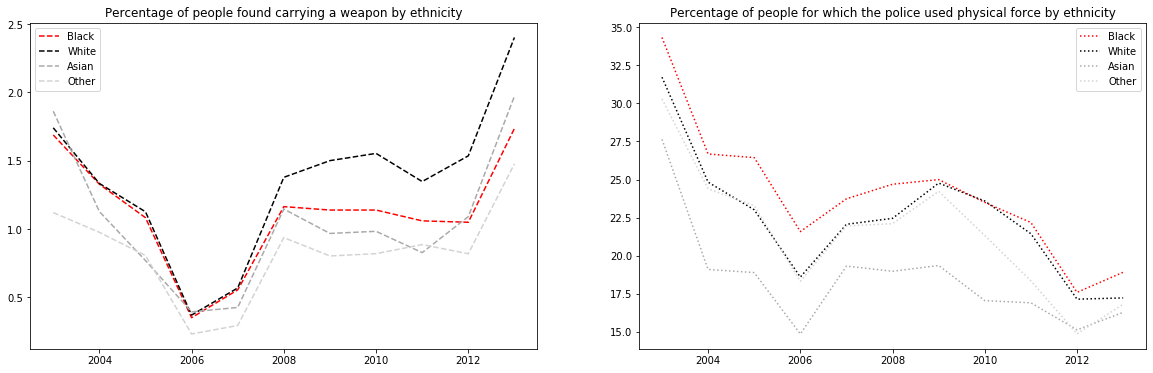

In [37]:
fig = plt.figure(figsize=(20,6))

ax = plt.subplot(1,2,1)
ax.plot(x, y_black_weapon, linestyle = 'dashed', color = 'red', label = 'Black')
ax.plot(x, y_white_weapon, linestyle = 'dashed', color = 'black', label = 'White')
ax.plot(x, y_asian_weapon, linestyle = 'dashed', color = 'darkgray', label = 'Asian')
ax.plot(x, y_other_weapon, linestyle = 'dashed', color = 'lightgray', label = 'Other')
ax.set_title('Percentage of people found carrying a weapon by ethnicity')
ax.legend(loc = 'upper left')

ax = plt.subplot(1,2,2)
ax.plot(x, y_black_physical_force, linestyle = 'dotted', color = 'red', label = 'Black')
ax.plot(x, y_white_physical_force, linestyle = 'dotted', color = 'black', label = 'White')
ax.plot(x, y_asian_physical_force, linestyle = 'dotted', color = 'darkgray', label = 'Asian')
ax.plot(x, y_other_physical_force, linestyle = 'dotted', color = 'lightgray', label = 'Other')
ax.set_title('Percentage of people for which the police used physical force by ethnicity')
ax.legend(loc = 'upper right')

The following cell runs additional checks to your code. Please **don't write any code here**. Just leave it as it is.

In [38]:
# LEAVE BLANK

In [39]:
# LEAVE BLANK

In [40]:
# LEAVE BLANK

In [41]:
# LEAVE BLANK

In [42]:
# LEAVE BLANK

In [43]:
# LEAVE BLANK

In [44]:
# LEAVE BLANK

In [45]:
# LEAVE BLANK

<div class="alert alert-danger"><b>Bonus 2 </b>Write the code to plot the total number of stops per borough for every year.<br/><ol><li>Write the code to store the x data for your plot in <b>list</b> form in a new variable called <i>x</i>. Store the y data for your plot in <b>list</b> form in separate variables called <i>y_manhattan</i>, <i>y_brooklyn</i>, <i>y_bronx</i>, <i>y_queens</i> and <i>y_staten_island</i>.</li>
<li>Write the code to plot these data using a stacked bar plot. Initialize your plot to a figure called <i>fig</i>. Set the bar's color for "Manhattan" to e63946, for "Brooklyn" to f1faee, for "Bronx" to a8dadc, for "Queens" to 457b9d and for "Staten Island" to 1d3557. Set the plot's title to <i>People stopped by borough</i>. Make sure a legend appears to the <b>upper left</b> of your plot and that the labels in the legend correspond to the different categories of the <i>boro</i> attribute.</li></ol></div>

<img src='https://www.dropbox.com/s/kmsggqo58s7gnja/b2.png?raw=1' width=500>

In [46]:
x = list(df['year'].unique())
y_manhattan = df[df['boro'] == 'Manhattan'].groupby('year')['ethnicity'].count().tolist()
y_brooklyn = df[df['boro'] == 'Brooklyn'].groupby('year')['ethnicity'].count().tolist()
y_bronx = df[df['boro'] == 'Bronx'].groupby('year')['ethnicity'].count().tolist()
y_queens = df[df['boro'] == 'Queens'].groupby('year')['ethnicity'].count().tolist()
y_staten_island = df[df['boro'] == 'Staten Island'].groupby('year')['ethnicity'].count().tolist()

Text(0.5, 1.0, 'People stopped by borough')

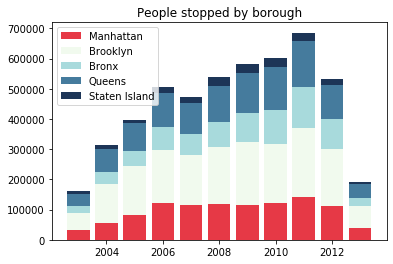

In [47]:
q = y_manhattan + y_brooklyn
fig = plt.figure()
plt.bar(x, y_manhattan, label='Manhattan', color='#e63946')
plt.bar(x, y_brooklyn, label='Brooklyn', bottom = y_manhattan, color = '#f1faee')
plt.bar(x, y_bronx, label='Bronx', bottom = np.array(y_manhattan) + np.array(y_brooklyn), color = '#a8dadc')
plt.bar(x, y_queens, label='Queens', bottom = np.array(y_manhattan) + np.array(y_brooklyn) + np.array(y_bronx), color = '#457b9d')
plt.bar(x, y_staten_island, label='Staten Island', bottom = np.array(y_manhattan) + np.array(y_brooklyn) + np.array(y_bronx) + np.array(y_queens), color = '#1d3557')
plt.legend(loc='upper left')
plt.title('People stopped by borough')

The following cell runs additional checks to your code. Please **don't write any code here**. Just leave it as it is.

In [48]:
# LEAVE BLANK

In [ ]:
# LEAVE BLANK

In [ ]:
# LEAVE BLANK